In [7]:
import math
ts = [0.43, 0.52, .60, .69]
g = -9.8
for i, t in enumerate(ts):
  sin_t = 0.5299192642332
  b = -((sin_t * t) - 25.446)
  a = (-31.6615)
  c = -(0.3861 - 4.9 * t * t) 
  det = math.sqrt(b * b - 4 * a * c)
  v = (-b - det) / (2 * a)
  print(f"For a time of {t} and power of {i * 10 + 30}, inital v is {v}")

For a time of 0.43 and power of 30, inital v is 0.8166009333747112
For a time of 0.52 and power of 40, inital v is 0.830682962167463
For a time of 0.6 and power of 50, inital v is 0.8451408662172472
For a time of 0.69 and power of 60, inital v is 0.8633594902804942


In [2]:
import math
ts = [0.43, 0.52, .60, .69]
g = -9.8
for i, t in enumerate(ts):
  sin_t = 0.5299192642332
  b = (sin_t * t - g * g / 2 * sin_t)
  a = (-g/2 * sin_t * sin_t + g * g * g / 8 * sin_t * sin_t)
  c = -(0.3861 - g/2 * t * t) 
  det = math.sqrt(b * b - 4 * a * c)
  v = (-b - det) / (2 * a)
  print(f"For a time of {t} and power of {i * 10 + 30}, inital v is {v}, v per 10 power is {v / (i * 10 + 30)}")

For a time of 0.43 and power of 30, inital v is -0.05503906158977267, v per 10 power is -0.0018346353863257557
For a time of 0.52 and power of 40, inital v is -0.07506458488855121, v per 10 power is -0.0018766146222137803
For a time of 0.6 and power of 50, inital v is -0.09755420484792557, v per 10 power is -0.0019510840969585114
For a time of 0.69 and power of 60, inital v is -0.12961627244537374, v per 10 power is -0.0021602712074228958


In [5]:
import math
ts = [0.43, 0.52, .605, .69]
g = -9.8
for i, t in enumerate(ts):
  v = (-g/2 * t * t - 0.3831) / sin_t / t
  print(f"For a time of {t} and power of {i * 10 + 30}, inital v is {v}, v per 10 power is {v / (i * 10 + 30)}")

# velocity in meters per second is approximately 0.0865 m/s per power

For a time of 0.43 and power of 30, inital v is 2.2948208331348914, v per 10 power is 0.07649402777116304
For a time of 0.52 and power of 40, inital v is 3.418009785679638, v per 10 power is 0.08545024464199094
For a time of 0.605 and power of 50, inital v is 4.39930573740798, v per 10 power is 0.0879861147481596
For a time of 0.69 and power of 60, inital v is 5.332477604460362, v per 10 power is 0.08887462674100603


In [9]:
0.0865 * 100

8.649999999999999

In [ ]:
import math
ts = [0.43, 0.52, .60, .69]
g = -9.8
for i, t in enumerate(ts):
  sin_t = 0.5299192642332
  a = g/2 * (t)
  b = (sin_t * t - g * g / 2 * sin_t)
  c = -(0.3861 - g/2 * t * t) 
  det = math.sqrt(b * b - 4 * a * c)
  v = (-b - det) / (2 * a)
  print(f"For a time of {t} and power of {i * 10 + 30}, inital v is {v}, v per 10 power is {v / (i * 10 + 30)}")

In [86]:
import matplotlib.pyplot as plt
import numpy as np
from math import sin, cos, pi, sqrt
import math
import time
global g
# Gravity, 10 is used for debugging
g = -9.81

def getPathOnXYFunction(funcs, delta_t = 0.01):
  '''
    Funcs - An array of two functions, the first one will return the x component of an objects trajectory at time point t, and the second will return the y component of an objects trajectory at time point t. It will run these function until the object hits the ground.

    Returns an array of x positions, y positions, and the time it took to hit the ground
  '''

  # Get the x and y functions out of the functions array so that we can more intuitively refer to them
  xFunc = funcs[0]
  yFunc = funcs[1]

  # Start off time at delta time (no need to compute the x and y positions at t=0 because we know that it will start on the group)
  t = delta_t

  # Create an array to store the x and y positions, initialize the array with the x and y positions at the first timestep
  x = [xFunc(t)]
  y = [yFunc(t)]
  
  # Run the functions until the y x of the function is less than 0 (the object has hit the ground)
  while y[-1] > 0 and x[-1] > 0:
    t += delta_t
    x.append(xFunc(t))
    y.append(yFunc(t))
  return x, y, t

def returnXYFuncs(theta, v_i):
  '''This will return two funcions, for the x and y component of the objects path, depending upon the objects initial launch angle (theta) and initial velocity'''
  return returnXFunc(theta, v_i), returnYFunc(theta, v_i)

def returnXFunc(theta, v_i):
  '''Returns the x component of the objects trajecotry using the following formula'''
  return lambda t: cos(theta) * v_i * t

def returnYFunc(theta, v_i):
  ''' Returns the x component of the objects trajecotry using the following formula.'''
  # NOTE: This function is assuming that you live on earth and thus acceleration is gravity
  return lambda t: (1/2 * g * t * t + sin(theta) * v_i * t)

def calculateRequiredInitialVelocityToPassThroughAPoint(coords):
  '''
  This is a function that I derived in order to calculate the required initial velocity for an object to pass through a point.
  The formula for this equation is:

         ______________________________________________
         |         ____________________________________
   v_i = |-2gy + __|((2gy)^2 - (4 * -(g^2 * x^2)))
         |----------------------------------------------
       __|                      2

  '''
  x = coords[0]
  y = coords[1]

  w = 2 * g * y
  q = - g * g * x * x

  squareRoot = sqrt((w * w) - (4 * q))
  expression = (-w + squareRoot)/2

  return (sqrt(expression))

def getThetaForPathToHitPoint(v_i, point, sizeOfPoint = 0.05):
  '''This function, when given the initial velocity required, will output the angle needed to shoot at.
    point - point we want to hit
    sizeOfPoint - the tolerance at which we can hit the point, at extereme initial velocities, this needs to be very high
  '''
  theta = 0
  go = True
  iterations = 0
  minimum_distance = 0

  # How this works is that it plots the trajectory of the object at changing angles of being shot, and it returns the correct angle once it is hit. This can be optimized by a hell of a lot and there is probably a mathetmatical formula that you can use to get the correct point in like 2 milliseconds buuuuuuut I already made a very good formula before that used a lot of brain power and Winter break was almost over so I settled on this solution, if I need to run this formula on a system that actually shoots things and is very time sensitive, then I will fix this, but otherwise there isn't a need to fix it. 
  while go:
    new_theta_1 = theta + (pi / 4) * 2 ** (-iterations)
    new_theta_2 = theta - (pi / 4) * 2 ** (-iterations)

    # Run a simulation for both new theta angles

    _x, _y, _t = getPathOnXYFunction(returnXYFuncs(new_theta_1, v_i))
    minimum_distance_theta_1 = float('inf')

    # Find the point that is the closest to the point we want to hit
    for x, y in zip(_x, _y):
      distance = sqrt((x - point[0])**2 + (y - point[1])**2)
      minimum_distance_theta_1 = min(minimum_distance_theta_1, distance)
    
    _x, _y, _t = getPathOnXYFunction(returnXYFuncs(new_theta_2, v_i))
    minimum_distance_theta_2 = float('inf')

    # Find the point that is the closest to the point we want to hit
    for x, y in zip(_x, _y):
      distance = sqrt((x - point[0])**2 + (y - point[1])**2)
      minimum_distance_theta_2 = min(minimum_distance_theta_2, distance)
    
    # If the new theta angles are closer to the point we want to hit, then we will use those angles
    if minimum_distance_theta_1 < minimum_distance_theta_2:
      minimum_distance = minimum_distance_theta_1
      theta = new_theta_1
    else:
      minimum_distance = minimum_distance_theta_2
      theta = new_theta_2

    print("Minimum distance: ", minimum_distance, "theta: ", theta)
    
    # If the point we want to hit is within the tolerance, then we are done
    if minimum_distance < sizeOfPoint:
      go = False

    iterations += 1
    if iterations > 50:
      print("Reached maximimum iterations!", theta)
      go = False

  return theta

def getViForPathToHitPoint(theta, point, sizeOfPoint = 0.05):
  '''This function, when given the initial velocity required, will output the angle needed to shoot at.
    point - point we want to hit
    sizeOfPoint - the tolerance at which we can hit the point, at extereme initial velocities, this needs to be very high
  '''
  vi = 0
  go = True
  iterations = 0
  minimum_distance = 0
  max_vi = 8.65
  delta_time = 0.001
  hit_time = 0

  # How this works is that it plots the trajectory of the object at changing angles of being shot, and it returns the correct angle once it is hit. This can be optimized by a hell of a lot and there is probably a mathetmatical formula that you can use to get the correct point in like 2 milliseconds buuuuuuut I already made a very good formula before that used a lot of brain power and Winter break was almost over so I settled on this solution, if I need to run this formula on a system that actually shoots things and is very time sensitive, then I will fix this, but otherwise there isn't a need to fix it. 
  while go:
    new_vi_1 = vi + (max_vi / 2) * 2 ** (-iterations)
    new_vi_2 = vi - (max_vi / 2) * 2 ** (-iterations)

    # Run a simulation for both new vi angles

    _x, _y, _t = getPathOnXYFunction(returnXYFuncs(theta, new_vi_1), delta_time)
    minimum_distance_vi_1 = float('inf')
    
    hit_time_vi_1 = 0
    
    # Find the point that is the closest to the point we want to hit
    for x, y in zip(_x, _y):
      distance = sqrt((x - point[0])**2 + (y - point[1])**2)
      minimum_distance_vi_1 = min(minimum_distance_vi_1, distance)
      if minimum_distance_vi_1 == distance:
        hit_time_vi_1 = (_x.index(x) + 1) * delta_time
    
    _x, _y, _t = getPathOnXYFunction(returnXYFuncs(theta, new_vi_2), delta_time)
    minimum_distance_vi_2 = float('inf')
    hit_time_vi_2 = 0
    # Find the point that is the closest to the point we want to hit
    for x, y in zip(_x, _y):
      distance = sqrt((x - point[0])**2 + (y - point[1])**2)
      minimum_distance_vi_2 = min(minimum_distance_vi_2, distance)
      if minimum_distance_vi_2 == distance:
        hit_time_vi_2 = (_x.index(x) + 1) * delta_time

    
    # If the new vi angles are closer to the point we want to hit, then we will use those angles
    if minimum_distance_vi_1 < minimum_distance_vi_2:
      minimum_distance = minimum_distance_vi_1
      vi = new_vi_1
      hit_time = hit_time_vi_1
    else:
      minimum_distance = minimum_distance_vi_2
      vi = new_vi_2
      hit_time = hit_time_vi_2

    print("Minimum distance: ", minimum_distance, "vi: ", vi, "at time", hit_time)
    
    # If the point we want to hit is within the tolerance, then we are done
    if minimum_distance < sizeOfPoint:
      go = False

    iterations += 1
    if iterations > 20:
      print("Reached maximimum iterations!", vi)
      go = False

  return vi, hit_time
      

def plotTrajectory(point, theta, v_i, plot = False, sizeOfPoint = 0.1):
  '''This function will get the minimum initial velocity and angle at which you need to shoot the object at for a specific point, if you want to plot that then set plot to True.'''
  
  if plot:
    _x, _y, _t = getPathOnXYFunction(returnXYFuncs(theta, v_i))
    plt.plot(_x,_y, label = "Path of Object")
    plt.plot(point[0], point[1], 'ro', label = "Goal")
    plt.xlabel("X Position Of Object (m)")
    plt.ylabel("Y Position Of Object (m)")
    plt.title("Path of Object Towards A Goal Point")
    plt.legend()
  plt.show()
  return v_i, theta


(3.6576, 0.254)
Minimum distance:  1.903645944487058 vi:  4.325 at time 0.494
Minimum distance:  0.04830499698612651 vi:  6.487500000000001 at time 0.676
Minimum distance:  0.5297091621675661 vi:  7.5687500000000005 at time 0.605
Minimum distance:  0.2604840434041896 vi:  7.028125 at time 0.645
Minimum distance:  0.11062274491036928 vi:  6.7578125 at time 0.661
Minimum distance:  0.03222143923985792 vi:  6.62265625 at time 0.669
Minimum distance:  0.008094437698501468 vi:  6.5550781250000005 at time 0.672
Minimum distance:  0.012477993539173041 vi:  6.588867187500001 at time 0.671
Minimum distance:  0.00377794811422402 vi:  6.571972656250001 at time 0.672
Minimum distance:  0.0027700261709840846 vi:  6.563525390625001 at time 0.672
Minimum distance:  0.0017079601917935076 vi:  6.567749023437501 at time 0.672
Minimum distance:  0.001811387973025292 vi:  6.5656372070312505 at time 0.672
Minimum distance:  0.0016110981268700642 vi:  6.566693115234376 at time 0.672
Minimum distance:  0.001

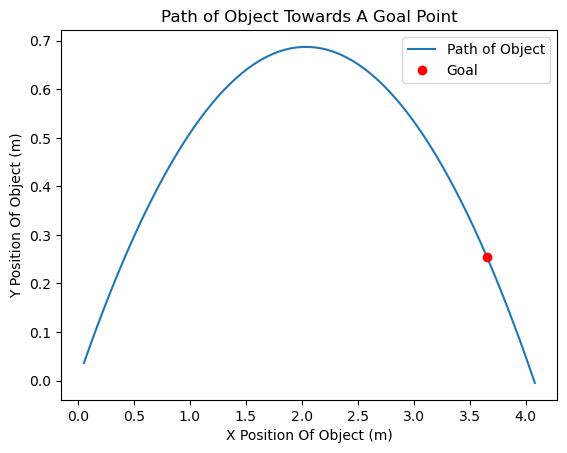

3.658499735960257 0.252669710770963


In [87]:
point = (144 * 2.54 / 100, (25 - 15) * 2.54 / 100)
ang = 34 * pi / 180
print(point)
v_i, hit_time = getViForPathToHitPoint(ang, point, sizeOfPoint = 0.001)
print(v_i / 8.65 * 100)
plotTrajectory(point, ang, v_i, plot=True)
xFunc, yFunc = returnXYFuncs(ang, v_i)
print(xFunc(hit_time), yFunc(hit_time))